In [47]:
import os

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

dat_fp = "../mag_data_copy/"

In [7]:
def load_data(folder):
    year = datetime(int(folder),1,1)
    dataframes = []
    
    for root, dirs, files in os.walk(folder):
        for file in files:
            try:
                date = year + timedelta(days=int(file[4:7])-1)
                day_dat = pd.read_csv(os.path.join(root, file), names=("time", "reading", "temperature"))
            except Exception as e:
                print(e)
            else:
                day_dat["time"] = pd.to_datetime(day_dat["time"], unit='s')
                day_dat["time"] = day_dat["time"].apply(lambda dt: dt.replace(year=date.year, month=date.month, day=date.day))
                dataframes.append(day_dat)

    sensor_dat = pd.concat(dataframes, ignore_index=True)
    sensor_dat.sort_values("time", inplace=True)
    sensor_dat.reset_index(drop=True, inplace=True)
    #sensor_dat = sensor_dat.dropna()
    #sensor_dat["time"] = [time.replace(year=2014) for time in sensor_dat["time"]]
    return sensor_dat


for year_data in ["2014", "2015", "2016", "2017", "2018"]:
    sensor_dat = load_data(dat_fp+year_data)
    sensor_dat.to_csv(year_data+"_mag_dat.csv", index=False)
    print(year_data)
    display(sensor_dat.head())

In [48]:
hour_change_2011 = {"start": datetime(year=2011, month=3, day=27, hour=1, minute=0, second=0), "end": datetime(year=2011, month=10, day=30, hour=2, minute=0, second=0)}
hour_change_2012 = {"start": datetime(year=2012, month=3, day=25, hour=1, minute=0, second=0), "end": datetime(year=2012, month=10, day=28, hour=2, minute=0, second=0)}
hour_change_2013 = {"start": datetime(year=2013, month=3, day=31, hour=1, minute=0, second=0), "end": datetime(year=2013, month=10, day=27, hour=2, minute=0, second=0)}

In [49]:
def load_2013_dat():
    
    dataframes = []
    
    for root, dirs, files in os.walk(dat_fp+"2013"):
        print("Files loaded:")
        for file in files:
            if file.lower().endswith(".csv"):
                try:
                    file = os.path.join(root, file)
                    # Retrieve file modification time.
                    date = datetime.fromtimestamp(os.path.getmtime(file))
                    day_dat = pd.read_csv(file, names=("time", "reading", "temperature"))
                    print(file)
                except Exception as e:
                    print(e)
                else:
                    # First, set the time to an integer, then to a string.
                    day_dat["time"] = day_dat["time"].astype('int').astype("str", copy=False)
                    # Make sure all strings are 6 characters long, filled with zeros
                    day_dat["time"] = day_dat["time"].apply(lambda dt : dt.zfill(6))
                    # Convert strings to datetimes, formatted as "%H%M%S".
                    day_dat["time"] = pd.to_datetime(day_dat["time"], format="%H%M%S")
                    # Include the current year, day, month in the datetimes, as retrieved from the file modification time.
                    day_dat["time"] = day_dat["time"].apply(lambda dt: dt.replace(year=date.year, month=date.month, day=date.day))
                    # Due to an error, the last recording in the csv's is for the next day.
                    # The error can be verified by checking whether the last time is
                    # earlier than the previous.
                    # We need a try-except because the csv may only contain 1 item.
                    try:
                        if day_dat.iloc[-1, 0] < day_dat.iloc[-2, 0]:
                            # if the last time is earlier than the previous, then add a day to the time.
                            day_dat.iloc[-1, 0] += timedelta(days=1)
                    except IndexError:
                        print("Warning! Only 1 reading in the csv!")
                        
                    dataframes.append(day_dat)

    sensor_dat = pd.concat(dataframes, ignore_index=True)
    # Readings were taken in GMT and BST. Make them all GMT (UTC).
    # Find BST times.
    BST_mask = ((sensor_dat["time"] >= hour_change_2011["start"]) & (sensor_dat["time"] < hour_change_2011["end"]))
    BST_mask |= ((sensor_dat["time"] >= hour_change_2012["start"]) & (sensor_dat["time"] < hour_change_2012["end"]))
    BST_mask |= ((sensor_dat["time"] >= hour_change_2013["start"]) & (sensor_dat["time"] < hour_change_2013["end"]))
    print(sensor_dat.shape, BST_mask.shape)
    # Subtract an hour from the bst times
    sensor_dat.loc[BST_mask, "time"] -= timedelta(hours=1)
    sensor_dat.set_index("time", inplace=True)
    
    return sensor_dat

sensor_dat = load_2013_dat()
sensor_dat.to_csv(dat_fp+"pre2014_mag_dat.csv")
sensor_dat.head()

Files loaded:
../mag_data_copy/2013/3000000.CSV
../mag_data_copy/2013/2020000.CSV
../mag_data_copy/2013/2000000.CSV
../mag_data_copy/2013/1960000.CSV
../mag_data_copy/2013/0810000.CSV
../mag_data_copy/2013/3280000.CSV
../mag_data_copy/2013/0321202.CSV
../mag_data_copy/2013/0830000.CSV
../mag_data_copy/2013/0820000.CSV
../mag_data_copy/2013/0310000.CSV
../mag_data_copy/2013/1360000.CSV
../mag_data_copy/2013/2070000.CSV
../mag_data_copy/2013/0550000.CSV
../mag_data_copy/2013/0930000.CSV
../mag_data_copy/2013/2300000.CSV
../mag_data_copy/2013/2290000.CSV
../mag_data_copy/2013/3560000.CSV
../mag_data_copy/2013/1260000.CSV
../mag_data_copy/2013/2720000.CSV
../mag_data_copy/2013/0900000.CSV
../mag_data_copy/2013/2350000.CSV
../mag_data_copy/2013/3170000.CSV
../mag_data_copy/2013/2880000.CSV
../mag_data_copy/2013/1920000.CSV
../mag_data_copy/2013/1730000.CSV
../mag_data_copy/2013/0691221.CSV
../mag_data_copy/2013/1340000.CSV
../mag_data_copy/2013/1970000.CSV
../mag_data_copy/2013/3610000.CSV


../mag_data_copy/2013/0080000.CSV
../mag_data_copy/2013/1860000.CSV
../mag_data_copy/2013/1780000.CSV
../mag_data_copy/2013/1870000.CSV
../mag_data_copy/2013/0270000.CSV
../mag_data_copy/2013/3450000.CSV
../mag_data_copy/2013/3270000.CSV
../mag_data_copy/2013/1390000.CSV
../mag_data_copy/2013/2370000.CSV
../mag_data_copy/2013/1660000.CSV
../mag_data_copy/2013/3580000.CSV
../mag_data_copy/2013/2430000.CSV
../mag_data_copy/2013/1050000.CSV
../mag_data_copy/2013/1720000.CSV
../mag_data_copy/2013/1440000.CSV
../mag_data_copy/2013/0950000.CSV
../mag_data_copy/2013/0760000.CSV
../mag_data_copy/2013/1020000.CSV
../mag_data_copy/2013/2960000.CSV
../mag_data_copy/2013/1640000.CSV
../mag_data_copy/2013/0330000.CSV
../mag_data_copy/2013/0510000.CSV
../mag_data_copy/2013/1230000.CSV
../mag_data_copy/2013/2860000.CSV
../mag_data_copy/2013/0661429.CSV
../mag_data_copy/2013/3010000.CSV
../mag_data_copy/2013/3320000.CSV
../mag_data_copy/2013/0940000.CSV
../mag_data_copy/2013/0450000.CSV
../mag_data_co

,reading,temperature
time,,
2011-10-27 23:00:05,31896.0,21.343
2011-10-27 23:00:08,31896.0,21.342
2011-10-27 23:00:11,31896.0,21.333
2011-10-27 23:00:14,31896.0,21.346
2011-10-27 23:00:17,31896.0,21.356


In [50]:
sensor_dat = pd.read_csv(dat_fp+"pre2014_mag_dat.csv")

In [51]:
sensor_dat["time"] = pd.to_datetime(sensor_dat["time"], format="%Y-%m-%d %H:%M:%S")

In [52]:
sensor_dat_yearsplit = {}
for year in sensor_dat["time"].dt.year.unique():
    sensor_dat_yearsplit[str(year)] = sensor_dat.loc[sensor_dat["time"].dt.year == year]
    sensor_dat_yearsplit[str(year)].to_csv(dat_fp+str(year)+"_mag_dat.csv", index=False)


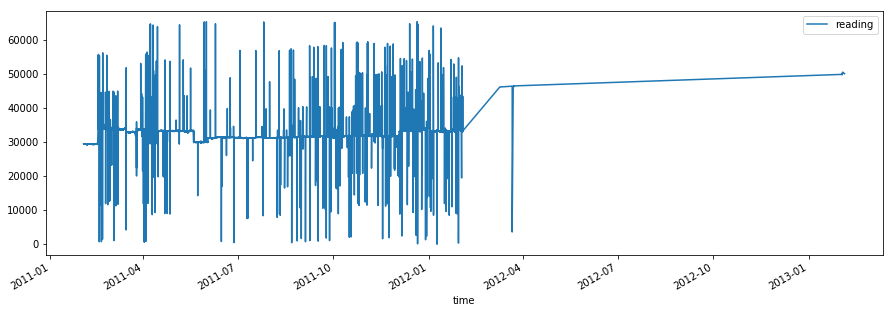

In [41]:
sensor_dat = sensor_dat.loc[sensor_dat["reading"] < 0.6e7]
sensor_dat.plot(x="time", y="reading", figsize=(15,5))

# plt.savefig("test.pdf")